<a href="https://colab.research.google.com/github/Kirthika030/fake-news-detection-ai/blob/main/Fake_News_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kirthika030/fake-news-detection-ai.git

Cloning into 'fake-news-detection-ai'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 34 (delta 8), reused 13 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 16.79 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [6]:
import os
print("📁 Your file structure:")
for root, dirs, files in os.walk('.'):
    level = root.replace('.', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        if file.endswith(('.h5', '.pkl', '.csv', '.py')):
            print(f'{subindent}{file}')

📁 Your file structure:
./
  .config/
    logs/
      2025.06.09/
    configurations/
  fake-news-detection-ai/
    cleaned_news.csv
    data/
      fake_or_real_news.csv
      cleaned_news.csv
    .git/
      objects/
        info/
        pack/
      logs/
        refs/
          remotes/
            origin/
          heads/
      info/
      refs/
        remotes/
          origin/
        heads/
        tags/
      hooks/
      branches/
    models/
      lstm_model.h5
      tokenizer.pkl
  sample_data/
    california_housing_train.csv
    mnist_test.csv
    california_housing_test.csv
    mnist_train_small.csv


In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import pad_sequences

# Load model and tokenizer (make sure files are uploaded)
try:
    model = load_model('/content/fake-news-detection-ai/models/lstm_model.h5')
    print("✅ LSTM Model loaded!")

    with open('/content/fake-news-detection-ai/models/tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)
    print("✅ Tokenizer loaded!")

    # Load cleaned data
    df = pd.read_csv('/content/fake-news-detection-ai/data/cleaned_news.csv')
    print("✅ Data loaded!")
    print(f"Dataset shape: {df.shape}")

except Exception as e:
    print(f"❌ Error loading files: {e}")
    print("Make sure you have uploaded: lstm_model.h5, tokenizer.pkl, cleaned_news.csv")

✅ LSTM Model loaded!
✅ Tokenizer loaded!
✅ Data loaded!
Dataset shape: (6335, 4)


In [9]:
X = df['clean_text']
y = df['label']

# Same split as used in training
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Test set size: {len(X_test)}")

# Convert text to sequences for LSTM
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=300)
print("✅ Test data prepared!")

Test set size: 1267
✅ Test data prepared!


In [10]:
print("Making predictions...")
y_pred_prob = model.predict(X_test_seq)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("✅ Predictions completed!")

Making predictions...
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
✅ Predictions completed!


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 MODEL ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))


🎯 MODEL ACCURACY: 0.8792 (87.92%)

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

        FAKE       0.87      0.89      0.88       628
        REAL       0.89      0.87      0.88       639

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



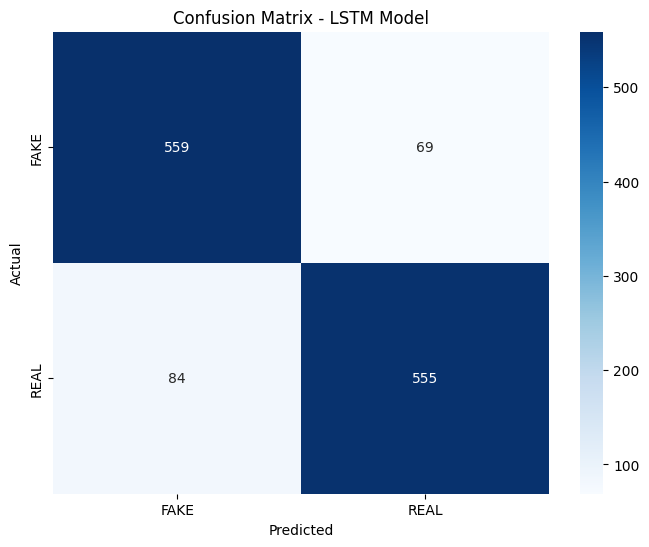

✅ Confusion matrix created!


In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix - LSTM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("✅ Confusion matrix created!")

In [13]:
print("\n🔍 SAMPLE PREDICTIONS:")
print("-" * 80)

# Get first 5 test samples
sample_texts = X_test.iloc[:5].values
sample_labels = y_test.iloc[:5].values
sample_preds = y_pred[:5]
sample_probs = y_pred_prob[:5].flatten()

for i in range(5):
    actual = "REAL" if sample_labels[i] == 1 else "FAKE"
    predicted = "REAL" if sample_preds[i] == 1 else "FAKE"
    confidence = sample_probs[i] if sample_preds[i] == 1 else 1 - sample_probs[i]

    print(f"\nSample {i+1}:")
    print(f"Text: {sample_texts[i][:100]}...")
    print(f"Actual: {actual}")
    print(f"Predicted: {predicted}")
    print(f"Confidence: {confidence:.3f}")
    print("-" * 40)

print("✅ Evaluation completed!")


🔍 SAMPLE PREDICTIONS:
--------------------------------------------------------------------------------

Sample 1:
Text: Will Trump pull a Brexit times ten? What would it take, beyond WikiLeaks, to bring the Clinton (cash...
Actual: FAKE
Predicted: FAKE
Confidence: 0.967
----------------------------------------

Sample 2:
Text: Clintons Are Under Multiple FBI Investigations as Agents Are Stymied   Source: Wall street on parade...
Actual: FAKE
Predicted: FAKE
Confidence: 0.990
----------------------------------------

Sample 3:
Text: Dispatches from Eric Zuesse This piece is crossposted at strategic-culture.org The power above the U...
Actual: FAKE
Predicted: FAKE
Confidence: 0.982
----------------------------------------

Sample 4:
Text: Print 
[Ed. – Every now and then the facade cracks. Somebody asks a question the media haven’t inter...
Actual: FAKE
Predicted: FAKE
Confidence: 0.932
----------------------------------------

Sample 5:
Text: Nanny In Jail After Force Feeding Baby To D

In [15]:
results_summary = {
    'Model': 'LSTM',
    'Accuracy': f"{accuracy:.4f}",
    'Test_Samples': len(X_test),
    'Correct_Predictions': np.sum(y_pred == y_test),
    'Wrong_Predictions': np.sum(y_pred != y_test)
}

print("\n📈 FINAL RESULTS SUMMARY:")
for key, value in results_summary.items():
    print(f"{key}: {value}")


📈 FINAL RESULTS SUMMARY:
Model: LSTM
Accuracy: 0.8792
Test_Samples: 1267
Correct_Predictions: 1114
Wrong_Predictions: 153


In [16]:
# CREATE STREAMLIT APP
# Run this in a new Colab cell

# First, create the app.py file
app_code = '''
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import pad_sequences
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
@st.cache_resource
def download_nltk_data():
    try:
        nltk.data.find('tokenizers/punkt')
        nltk.data.find('corpora/stopwords')
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('wordnet')

download_nltk_data()

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Clean and preprocess text same as training data"""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Load model and tokenizer
@st.cache_resource
def load_model_and_tokenizer():
    try:
        model = load_model('lstm_model.h5')
        with open('tokenizer.pkl', 'rb') as f:
            tokenizer = pickle.load(f)
        return model, tokenizer
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None, None

# Streamlit App
def main():
    st.set_page_config(
        page_title="Fake News Detector",
        page_icon="📰",
        layout="centered"
    )

    # Title and description
    st.title("📰 Fake News Detection System")
    st.markdown("### Powered by LSTM Deep Learning Model")
    st.write("Enter a news article below to check if it's real or fake!")

    # Load model
    model, tokenizer = load_model_and_tokenizer()

    if model is None or tokenizer is None:
        st.error("❌ Could not load the model. Please make sure model files are available.")
        return

    # Input section
    st.markdown("---")
    st.subheader("📝 Enter News Article")

    # Text input options
    input_method = st.radio(
        "Choose input method:",
        ["Type/Paste Text", "Upload Text File"]
    )

    user_input = ""

    if input_method == "Type/Paste Text":
        user_input = st.text_area(
            "Paste your news article here:",
            height=200,
            placeholder="Enter the news article text here..."
        )
    else:
        uploaded_file = st.file_uploader("Choose a text file", type="txt")
        if uploaded_file is not None:
            user_input = str(uploaded_file.read(), "utf-8")
            st.text_area("Uploaded content:", user_input, height=150)

    # Prediction section
    if st.button("🔍 Analyze News", type="primary"):
        if user_input.strip():
            with st.spinner("Analyzing the article..."):
                try:
                    # Preprocess the input
                    cleaned_input = clean_text(user_input)

                    # Convert to sequence
                    sequence = tokenizer.texts_to_sequences([cleaned_input])
                    padded_sequence = pad_sequences(sequence, maxlen=300)

                    # Make prediction
                    prediction_prob = model.predict(padded_sequence)[0][0]

                    # Determine result
                    if prediction_prob > 0.5:
                        result = "REAL"
                        confidence = prediction_prob
                        color = "green"
                        icon = "✅"
                    else:
                        result = "FAKE"
                        confidence = 1 - prediction_prob
                        color = "red"
                        icon = "❌"

                    # Display results
                    st.markdown("---")
                    st.subheader("🎯 Analysis Results")

                    col1, col2 = st.columns(2)

                    with col1:
                        st.markdown(f"### {icon} Prediction")
                        st.markdown(f"<h2 style='color: {color};'>{result} NEWS</h2>",
                                   unsafe_allow_html=True)

                    with col2:
                        st.markdown("### 📊 Confidence")
                        st.markdown(f"<h2>{confidence:.1%}</h2>", unsafe_allow_html=True)

                        # Confidence bar
                        st.progress(confidence)

                    # Additional info
                    st.markdown("---")
                    st.markdown("### 📋 Analysis Details")

                    if result == "FAKE":
                        st.warning("⚠️ This article shows characteristics of fake news. Be cautious about sharing or believing this information.")
                        st.info("🔍 Consider checking multiple reliable sources before accepting this information.")
                    else:
                        st.success("✅ This article appears to be legitimate news.")
                        st.info("📰 Remember to always verify information from multiple trusted sources.")

                    # Technical details (expandable)
                    with st.expander("🔧 Technical Details"):
                        st.write(f"**Model Type:** LSTM Neural Network")
                        st.write(f"**Raw Prediction Score:** {prediction_prob:.6f}")
                        st.write(f"**Processed Text Length:** {len(cleaned_input.split())} words")
                        st.write(f"**Original Text Length:** {len(user_input.split())} words")

                except Exception as e:
                    st.error(f"❌ Error during analysis: {str(e)}")
        else:
            st.warning("⚠️ Please enter some text to analyze!")

    # Footer
    st.markdown("---")
    st.markdown(
        """
        <div style='text-align: center; color: gray;'>
        <p>🎓 Built by College Students | Team Project</p>
        <p>⚠️ This is an educational project. Always verify news from multiple reliable sources.</p>
        </div>
        """,
        unsafe_allow_html=True
    )

if __name__ == "__main__":
    main()
'''

# Write the app to a file
with open('app.py', 'w') as f:
    f.write(app_code)

print("✅ app.py created successfully!")
print("\nTo run the app:")
print("1. Make sure lstm_model.h5 and tokenizer.pkl are in the same folder")
print("2. Run: streamlit run app.py")

✅ app.py created successfully!

To run the app:
1. Make sure lstm_model.h5 and tokenizer.pkl are in the same folder
2. Run: streamlit run app.py
